# Data Wrangling

In [1]:
#General libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#NLP libraries
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.collocations import *
from nltk.sentiment import SentimentIntensityAnalyzer

In [120]:
#read in cnbc dataset
cnbc = pd.read_csv('../Data/cnbc_headlines.csv')
cnbc.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."


In [114]:
cnbc.shape

(3080, 3)

In [5]:
cnbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB


In [121]:
#get rid of null rows
cnbc.dropna(inplace=True)
cnbc.shape

(2800, 3)

In [122]:
#convert 'Time' to datetime
cnbc['datetime'] = pd.to_datetime(cnbc['Time'])
#date column
cnbc['Date'] = pd.to_datetime(cnbc.Time).dt.date

C:\Users\bwitt\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname ET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [123]:
#set index to datetime and then sort
cnbc = cnbc.set_index('datetime').sort_index()
cnbc.head()

,Headlines,Time,Description,Date
datetime,,,,
2017-12-22 18:52:00,Cramer: Never buy a stock all at once — you'll...,"6:52 PM ET Fri, 22 Dec 2017",Jim Cramer doubled down on his key investing r...,2017-12-22
2017-12-22 19:07:00,Cramer: I helped investors through the 2010 fl...,"7:07 PM ET Fri, 22 Dec 2017","Jim Cramer built on his ""nobody ever made a di...",2017-12-22
2017-12-22 19:07:00,Cramer says owning too many stocks and too lit...,"7:07 PM ET Fri, 22 Dec 2017",Jim Cramer broke down why owning fewer stocks ...,2017-12-22
2017-12-26 10:15:00,Markets lack Christmas cheer,"10:15 AM ET Tue, 26 Dec 2017","According to Kensho, here's how markets have f...",2017-12-26
2017-12-27 10:13:00,S&P tends to start new year bullish after this...,"10:13 AM ET Wed, 27 Dec 2017",The S&P is on track to end the year up 20 perc...,2017-12-27


In [124]:
#check for duplicated headlines
cnbc.drop_duplicates('Headlines').shape

(2788, 4)

Interesting, we have a few duplicated headlines. Of course, this is probably because the same article can be updated multiple times throughout the day. Let's see what is going on..

In [84]:
cnbc[cnbc['Headlines'].duplicated()]

,Headlines,Time,Description,Date
datetime,,,,
2020-01-10 19:37:00,"Everything Jim Cramer said on 'Mad Money,' inc...","7:37 PM ET Fri, 10 Jan 2020",CNBC's Jim Cramer gave a preview of the week a...,2020-01-10
2019-02-12 19:11:00,"Cramer: Charts show steady investor optimism, ...","7:11 PM ET Tue, 12 Feb 2019",Jim Cramer and technician Carley Garner check ...,2019-02-12
2019-02-05 19:06:00,Cramer: Charts suggest investors 'can afford t...,"7:06 PM ET Tue, 5 Feb 2019",Jim Cramer calls on technician Rob Moreno to p...,2019-02-05
2018-02-28 10:51:00,"Cramer Remix: Even on down days, HP Inc. and H...","10:51 AM ET Wed, 28 Feb 2018",Jim Cramer highlights the growth behind HP Inc...,2018-02-28
2018-02-27 19:18:00,Cramer's charts reveal that investors' euphori...,"7:18 PM ET Tue, 27 Feb 2018",Jim Cramer and technician Carley Garner inspec...,2018-02-27
2018-02-26 19:09:00,Cramer's favorite market indicator is signalin...,"7:09 PM ET Mon, 26 Feb 2018","Jim Cramer returns to ""Mad Money"" with a fresh...",2018-02-26
2018-02-09 19:29:00,Cramer reviews the Dow's 10 biggest losers dur...,"7:29 PM ET Fri, 9 Feb 2018",Jim Cramer finds bull and bear cases in the Do...,2018-02-09
2018-01-05 18:59:00,Cramer Remix: Common sense can make you money ...,"6:59 PM ET Fri, 5 Jan 2018","Jim Cramer explained how observations, and not...",2018-01-05
2018-01-05 19:43:00,Cramer says the S&P 500's biggest 2017 losers ...,"7:43 PM ET Fri, 5 Jan 2018",Jim Cramer ran through the S&P 500's worst per...,2018-01-05


In [104]:
#function to return info on duplicated headlines
def dup_headline(n):
    dup_headline = cnbc[cnbc['Headlines'].duplicated()]['Headlines'][n]
    hl = cnbc[cnbc['Headlines'] == dup_headline][['Headlines']]
    return(hl)

In [105]:
#check first 5 instances of duplicated headlines
for i in range(5):
    print(dup_headline(i))

                                                             Headlines
datetime                                                              
2020-01-14 20:17:00  Everything Jim Cramer said on 'Mad Money,' inc...
2020-01-10 19:37:00  Everything Jim Cramer said on 'Mad Money,' inc...
                                                             Headlines
datetime                                                              
2019-02-12 19:03:00  Cramer: Charts show steady investor optimism, ...
2019-02-12 19:11:00  Cramer: Charts show steady investor optimism, ...
                                                             Headlines
datetime                                                              
2019-02-05 19:04:00  Cramer: Charts suggest investors 'can afford t...
2019-02-05 19:06:00  Cramer: Charts suggest investors 'can afford t...
                                                             Headlines
datetime                                                              
2018-0

Printing out the duplicates, we see that the they are simply updates made to the article. Usually, these updates occur on the same day, but in some cases the updates can be made several days later.

It probably makes the most sense to take the earliest headline since it reflects best what happened in the stock market at that point in time.

In [125]:
#take only earliest headline by only keeping first instance (since dataframe is already sorted by ascending date)
cnbc.drop_duplicates(subset=['Headlines'],keep='first',inplace=True)
cnbc.shape

(2788, 4)

# NLP EDA

In [55]:
#set standard english stop words
stop_words = set(stopwords.words('english'))

## Checking frequencies of words and n-grams

In [56]:
#joining all headlines together to feed to tokenizer for frequency analysis
headlines = ''.join(cnbc.Headlines.str.strip().str.lower())

In [129]:
#funciton to tokenize string and plot word frequency
#
def word_freq_plotter(string, remove_stop_words=True,cutoff_len=2,max_words=25):
    #tokenize string to words
    words = nltk.word_tokenize(string)

    # Specify that word length must be greater than cutoff
    if remove_stop_words == True:
        stop_words_list = stop_words
    else:
        stop_words_list = '-'
    
    #Remove stop words and words with length less than specified cutoff length
    words2 = list([word for word in words if word not in stop_words_list and len(word) > cutoff_len and word.isalpha()])
    
    # Get word frequencies
    words_freq = nltk.FreqDist(words2)

    #Plot word frequencies up to max
    words_freq.plot(max_words, cumulative=False)
    #print(word_freqs.pprint())

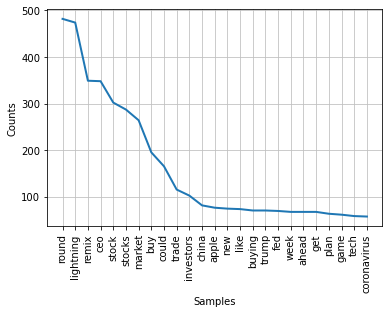

In [130]:
word_freq_plotter(string=headlines)

In [58]:
def n_gram_freq(string, n_gram = 2, remove_stop_words=True,cutoff_len=2,max_words=25):
    #tokenize string to words
    words = nltk.word_tokenize(string)

    # Specify that word length must be greater than cutoff
    if remove_stop_words == True:
        stop_words_list = stop_words
    else:
        stop_words_list = '-'
    
    #Remove stop words and words with length less than specified cutoff length
    words2 = list([word for word in words if word not in stop_words_list and len(word) > cutoff_len and word.isalpha()])
    words2 = nltk.Text(words2)

    # Find n-grams
    if n_gram == 2:
        finder = nltk.collocations.BigramCollocationFinder.from_words(words2)
    elif n_gram == 3:
        finder = nltk.collocations.TrigramCollocationFinder.from_words(words2)
    elif n_gram == 4:
        finder = nltk.collocations.QuadgramCollocationFinder.from_words(words2)
        
    #print(n_grams)
    print(finder.ngram_fd.most_common(5))

    #Plot word frequencies up to max
    #words_freq.plot(max_words, cumulative=False)
    #print(word_freqs.pprint())

In [49]:
#5 most common n-grams (for n=2,3,4)
for i in range(2,5):
    n_gram_freq(string=headlines,n_gram=i)
    print('---------------------------------------------------')

[(('lightning', 'round'), 473), (('jim', 'cramer'), 298), (('cramer', 'said'), 109), (('money', 'including'), 109), (('said', 'money'), 108)]
---------------------------------------------------
[(('jim', 'cramer', 'said'), 109), (('cramer', 'said', 'money'), 108), (('said', 'money', 'including'), 107), (('jim', 'cramer', 'sayscramer'), 48), (('sayscramer', 'lightning', 'round'), 42)]
---------------------------------------------------
[(('jim', 'cramer', 'said', 'money'), 108), (('cramer', 'said', 'money', 'including'), 107), (('jim', 'cramer', 'sayscramer', 'lightning'), 24), (('cramer', 'sayscramer', 'lightning', 'round'), 24), (('sayseverything', 'jim', 'cramer', 'said'), 18)]
---------------------------------------------------


In [131]:
#removal of additional unwanted words that probably do not pertain to stock market trends
addtln_stop_words = ['cramer','jim','mad','money','said','says','sayscramer','earnings','including']
#update stop words
stop_words.update(addtln_stop_words)

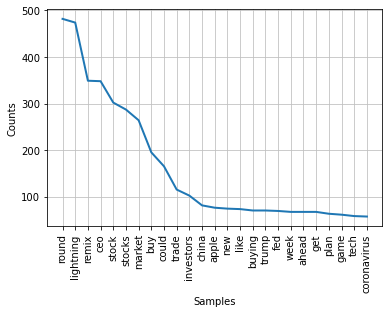

In [132]:
word_freq_plotter(string=headlines)

In [126]:
#unique headlines per day on average
cnbc.groupby('Date')['Headlines'].nunique().mean()

4.555555555555555

# Pull in Stock Market Data for Time Period of Headlines

Data comes from the Wall Street Journal for S&P 500 between 12-22-2017 and 07-19-2020
https://www.wsj.com/market-data/quotes/index/SPX/historical-prices

In [145]:
sp500 = pd.read_csv('../Data/S&P_500_HistoricalPrices_2017-12-22__2020-07-19.csv')
sp500.head()

,Date,Open,High,Low,Close
0,7/17/2020,3224.21,3233.52,3205.65,3224.73
1,7/16/2020,3208.36,3220.39,3198.59,3215.57
2,7/15/2020,3225.98,3238.28,3200.76,3226.56
3,7/14/2020,3141.11,3200.95,3127.66,3197.52
4,7/13/2020,3205.08,3235.32,3149.43,3155.22


In [146]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    645 non-null    object 
 1    Open   645 non-null    float64
 2    High   645 non-null    float64
 3    Low    645 non-null    float64
 4    Close  645 non-null    float64
dtypes: float64(4), object(1)
memory usage: 25.3+ KB


In [158]:
sp500 = sp500.set_index(pd.to_datetime(sp500.Date))

In [192]:
#get difference in closing price from previous business day
sp500['diff'] = sp500[' Close'].pct_change()
sp500['diff']

Date
2020-07-17         NaN
2020-07-16   -0.002841
2020-07-15    0.003418
2020-07-14   -0.009000
2020-07-13   -0.013229
                ...   
2017-12-29   -0.008235
2017-12-28    0.005210
2017-12-27   -0.001831
2017-12-26   -0.000790
2017-12-22    0.001060
Name: diff, Length: 645, dtype: float64

## Sentiment Analysis

Using the valence aware dictionary and sentiment reasoner (VADAR) pre-trained sentiment analyzer in NLTK, we can start with some basic analysis on the article's headlines. VADAR is suited for shorter texts, like that commonly found on social media, as opposed to longer text with more complex structured sentences. This makes VADAR great for analyzing sentiment of article headlines!

We will run the analysis on the original headlines and also again with stop words removed.

In [133]:
 sia = SentimentIntensityAnalyzer()

In [252]:
#compute sentiment compound
cnbc['sa_cmpd_score'] = cnbc['Headlines'].apply(lambda hl : sia.polarity_scores(hl)['compound'])
#compute sentiment positive
cnbc['sa_pos_score'] = cnbc['Headlines'].apply(lambda hl : sia.polarity_scores(hl)['pos'])
#compute sentiment negative
cnbc['sa_neg_score'] = cnbc['Headlines'].apply(lambda hl : sia.polarity_scores(hl)['neg'])

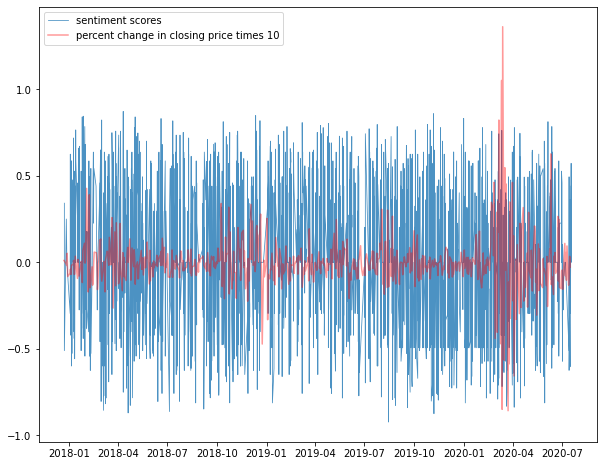

In [205]:
plt.figure(figsize=(10,8))
plt.plot(cnbc.index,cnbc.sa_cmpd_score,alpha=0.8,linewidth=0.8)
plt.plot(sp500.index,sp500['diff']*10,color='red',alpha=0.4, linestyle='-')
plt.legend(['sentiment scores','percent change in closing price times 10'])

There is a lot of noise for the sentiment score of the articles. One reason for this is that multiple articles are published on any given day. Let's take the mean of the scores for a given day.

In [253]:
cnbc_ss_avg = pd.DataFrame(cnbc.groupby('Date')['sa_cmpd_score','sa_pos_score','sa_neg_score'].mean())
cnbc_ss_avg

<ipython-input-253-0aa747530ffe>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cnbc_ss_avg = pd.DataFrame(cnbc.groupby('Date')['sa_cmpd_score','sa_pos_score','sa_neg_score'].mean())


,sa_cmpd_score,sa_pos_score,sa_neg_score
Date,,,
2017-12-22,-0.190333,0.060000,0.121333
2017-12-26,0.250000,0.434000,0.303000
2017-12-27,0.000000,0.000000,0.000000
2018-01-02,0.190486,0.134714,0.038286
2018-01-03,0.093900,0.179167,0.106333
...,...,...,...
2020-07-13,-0.169000,0.117000,0.186600
2020-07-14,-0.098667,0.000000,0.058667
2020-07-15,-0.060600,0.083250,0.082500


In [254]:
cnbc_ss_avg = cnbc_ss_avg.set_index(pd.to_datetime(cnbc_ss_avg.index))
cnbc_ss_avg.index

DatetimeIndex(['2017-12-22', '2017-12-26', '2017-12-27', '2018-01-02',
               '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2020-06-30', '2020-07-01', '2020-07-02', '2020-07-06',
               '2020-07-07', '2020-07-13', '2020-07-14', '2020-07-15',
               '2020-07-16', '2020-07-17'],
              dtype='datetime64[ns]', name='Date', length=612, freq=None)

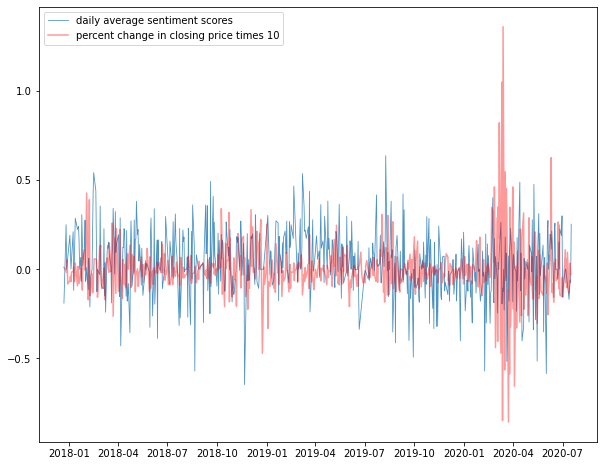

In [218]:
plt.figure(figsize=(10,8))
plt.plot(cnbc_ss_avg.index,cnbc_ss_avg.sa_cmpd_score,alpha=0.8,linewidth=0.8)
plt.plot(sp500.index,sp500['diff']*10,color='red',alpha=0.4, linestyle='-')
plt.legend(['daily average sentiment scores','percent change in closing price times 10'])

### Weekly averages of stock market and sentiment scores

In [255]:
wkly_ss = pd.DataFrame(cnbc_ss_avg.resample('W-Mon').mean())
wkly_sp500 = pd.DataFrame(sp500['diff'].resample('W-Mon').mean())

Text(0.5, 1.0, 'Weekly Averages')

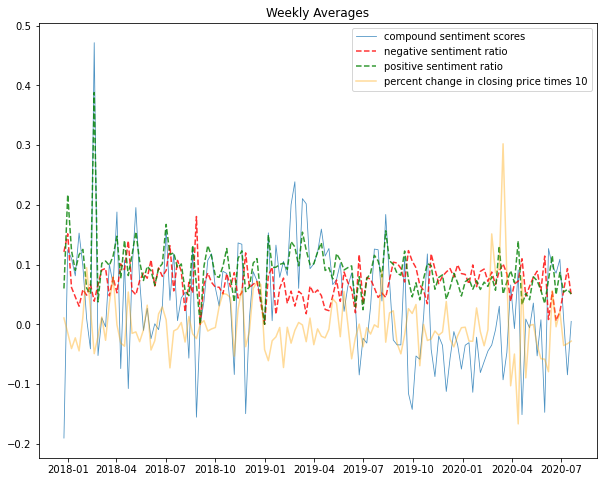

In [258]:
plt.figure(figsize=(10,8))
plt.plot(wkly_ss.index,wkly_ss.sa_cmpd_score,alpha=0.8,linewidth=0.8)
plt.plot(wkly_ss.index,wkly_ss.sa_neg_score,alpha=0.8, linestyle='--',color='red')
plt.plot(wkly_ss.index,wkly_ss.sa_pos_score,alpha=0.8, linestyle='--',color='green')
plt.plot(wkly_sp500.index,wkly_sp500['diff']*10,color='orange',alpha=0.4, linestyle='-')
plt.legend(['compound sentiment scores', 'negative sentiment ratio',
            'positive sentiment ratio',
            'percent change in closing price times 10'])
plt.title('Weekly Averages')

In [245]:
from scipy.stats import pearsonr
#calculate Pearson correlation (with p-value)
pearsonr(wkly_sp500['diff'],wkly_ss['sa_cmpd_score'])

(-0.14273284121823457, 0.09864647789110943)

There is no evidence for the correlation of the weekly averages of sentiment scores and stock market change.

In [260]:
pearsonr(wkly_sp500['diff'],wkly_ss['sa_pos_score'])

(-0.09424972397863125, 0.2768944676585289)

In [261]:
pearsonr(wkly_sp500['diff'],wkly_ss['sa_neg_score'])

(0.10911741014353117, 0.20773947667696793)

### Does removing stopwords from headlines affect the outcome?

In [263]:
#load regex library
import re

In [289]:
#define stop words and put in form for regex
stop_words_regex = r'\b|\b'.join(stop_words)

In [290]:
#add condition that words should be alpha or white space
stop_words_regex = stop_words_regex + '\\b|[^a-zA-Z\\s]'

In [293]:
#define variable for new headlines
cnbc['Headlines_sw'] = cnbc['Headlines'].apply(lambda hl : re.sub(pattern=stop_words_regex, repl='', string=hl,flags=re.IGNORECASE))

In [294]:
#check results
cnbc[['Headlines','Headlines_sw']]

,Headlines,Headlines_sw
datetime,,
2017-12-22 18:52:00,Cramer: Never buy a stock all at once — you'll...,Never buy stock almost definitely get b...
2017-12-22 19:07:00,Cramer: I helped investors through the 2010 fl...,helped investors flash crash following o...
2017-12-22 19:07:00,Cramer says owning too many stocks and too lit...,owning many stocks little cash set fa...
2017-12-26 10:15:00,Markets lack Christmas cheer,Markets lack Christmas cheer
2017-12-27 10:13:00,S&P tends to start new year bullish after this...,P tends start new year bullish happens
...,...,...
2020-07-16 20:03:00,Acorns CEO: Parents can turn $5 into five figu...,Acorns CEO Parents turn five figures kids...
2020-07-17 16:24:00,IQ Capital CEO Keith Bliss says tech and healt...,IQ Capital CEO Keith Bliss tech healthcare ...
2020-07-17 19:25:00,"Cramer's week ahead: Big week for earnings, ev...",week ahead Big week even bigger week vaccines


In [295]:
#compute sentiment compound
cnbc['sa_cmpd_score_sw'] = cnbc['Headlines_sw'].apply(lambda hl : sia.polarity_scores(hl)['compound'])
#compute sentiment positive
cnbc['sa_pos_score_sw'] = cnbc['Headlines_sw'].apply(lambda hl : sia.polarity_scores(hl)['pos'])
#compute sentiment negative
cnbc['sa_neg_score_sw'] = cnbc['Headlines_sw'].apply(lambda hl : sia.polarity_scores(hl)['neg'])

In [305]:
cnbc_ss_avg_sw = pd.DataFrame(cnbc.groupby('Date')['sa_cmpd_score_sw','sa_pos_score_sw','sa_neg_score_sw'].mean())
cnbc_ss_avg_sw = cnbc_ss_avg_sw.set_index(pd.to_datetime(cnbc_ss_avg_sw.index))
wkly_ss_sw = pd.DataFrame(cnbc_ss_avg_sw.resample('W-Mon').mean())

<ipython-input-305-56c508be354d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cnbc_ss_avg_sw = pd.DataFrame(cnbc.groupby('Date')['sa_cmpd_score_sw','sa_pos_score_sw','sa_neg_score_sw'].mean())


Text(0.5, 1.0, 'Weekly Averages')

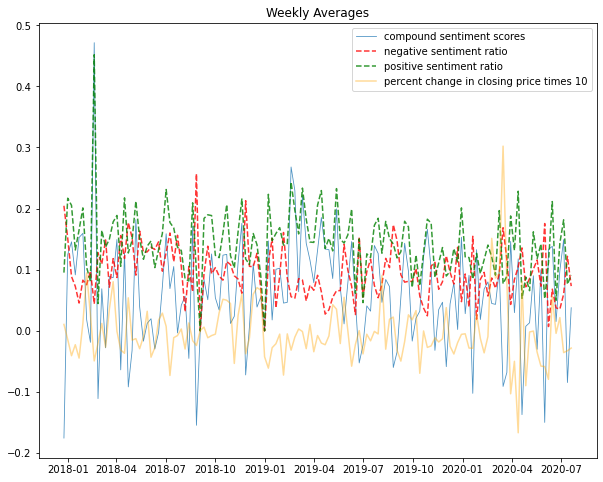

In [307]:
wkly_ss = pd.DataFrame(cnbc_ss_avg.resample('W-Mon').mean())

plt.figure(figsize=(10,8))
plt.plot(wkly_ss_sw.index,wkly_ss_sw.sa_cmpd_score_sw,alpha=0.8,linewidth=0.8)
plt.plot(wkly_ss_sw.index,wkly_ss_sw.sa_neg_score_sw,alpha=0.8, linestyle='--',color='red')
plt.plot(wkly_ss_sw.index,wkly_ss_sw.sa_pos_score_sw,alpha=0.8, linestyle='--',color='green')
plt.plot(wkly_sp500.index,wkly_sp500['diff']*10,color='orange',alpha=0.4, linestyle='-')
plt.legend(['compound sentiment scores', 'negative sentiment ratio',
            'positive sentiment ratio',
            'percent change in closing price times 10'])
plt.title('Weekly Averages')

In [310]:
#calculate Pearson correlation (with p-value)
print(pearsonr(wkly_sp500['diff'],wkly_ss_sw['sa_cmpd_score_sw']))
print(pearsonr(wkly_sp500['diff'],wkly_ss_sw['sa_pos_score_sw']))
print(pearsonr(wkly_sp500['diff'],wkly_ss_sw['sa_neg_score_sw']))

(-0.15825817407648649, 0.06676302779625667)
(-0.11617889544613405, 0.17963715023518761)
(0.10514774227333613, 0.22485717337635358)


With some of the stopwords removed, there is now a much better case for a correlation between the sentiment analysis compound score and the general movement of the S&P 500 index closing price.